# boston-house-prediction

In [1]:
#import libraries
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  


from sklearn import datasets  
from sklearn.model_selection import train_test_split,GridSearchCV   
from sklearn.preprocessing import StandardScaler  
from scipy import stats  
from sklearn.feature_selection import f_regression  
from sklearn.model_selection import validation_curve  
from sklearn.metrics import mean_squared_error, r2_score   
from scipy import stats  
from sklearn.linear_model import LinearRegression    
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor   
from sklearn.ensemble import RandomForestRegressor  


import warnings  
warnings.filterwarnings('ignore') 

In [2]:
#Importing the Boston House Price Dataset
boston_dataset = datasets.load_boston()

In [3]:
#loading the dataset to a pandas data frame
housing = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
housing['target'] = boston_dataset.target
#dataset(10 samples)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
# checking the number of rows and Columns in the data frame
housing.shape

(506, 14)

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# check datatype and null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
housing.count

<bound method DataFrame.count of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98 

In [8]:
#missing values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [9]:
#duplicates  checking 
housing.duplicated().sum()

0

In [10]:
#describe dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# #notions

1.The dataset consists of 506 instances and 14 columns,
  out of which 13 columns are features and 1 column is a target. 
2.no duplicates in dataset
3.no null values 
4.only CHAS has catgorical value and 75% values are zero

In [11]:
#data visualization

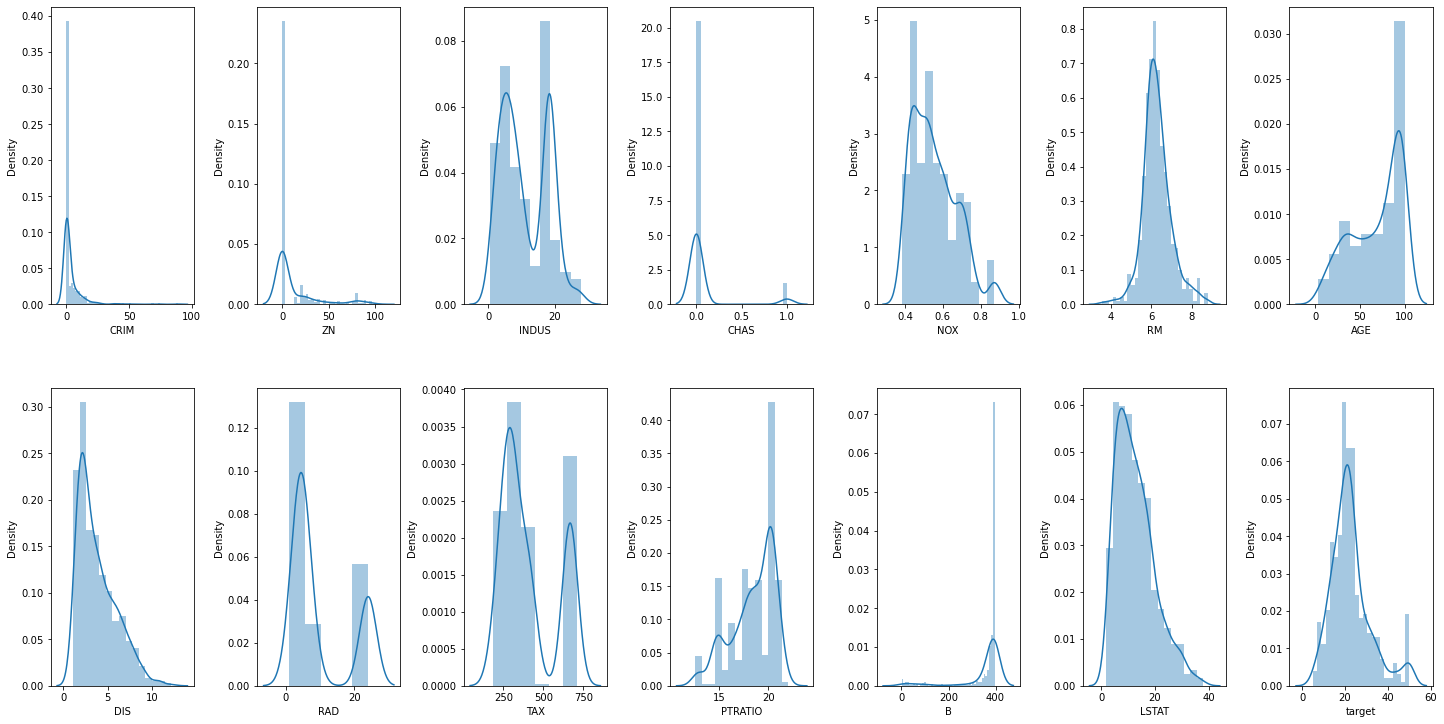

In [12]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [13]:
#CRIM, ZN ,CHAS, RN ,B and Target seems to have outlier and target is normally distributeed
#tax: double curve bells
#some features are having skewness 

In [14]:
 #These outliers can be removed by calculating the Z score 

In [15]:
housing = housing[(np.abs(stats.zscore(housing))<3).all(axis=1)]

In [16]:
#We are going to create now a correlation matrix to quantify and summarize the relationships between the variables.
corrdat = housing.corr()
corrdat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.235368,0.496014,NaN,0.543941,-0.256220,0.419317,-0.458391,0.797353,0.731316,0.322394,-0.306526,0.543535,-0.418531
ZN,-0.235368,1.000000,-0.482283,NaN,-0.484217,0.285338,-0.507627,0.601974,-0.265506,-0.277640,-0.400607,0.141924,-0.377615,0.306172
INDUS,0.496014,-0.482283,1.000000,NaN,0.734989,-0.395686,0.599328,-0.675009,0.548687,0.699422,0.361641,-0.316034,0.601658,-0.486369
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.543941,-0.484217,0.734989,NaN,1.000000,-0.311671,0.719230,-0.772557,0.579036,0.644144,0.160670,-0.356332,0.604435,-0.417222
RM,-0.256220,0.285338,-0.395686,NaN,-0.311671,1.000000,-0.219932,0.195682,-0.171454,-0.269194,-0.309908,0.146503,-0.630955,0.734041
AGE,0.419317,-0.507627,0.599328,NaN,0.719230,-0.219932,1.000000,-0.719924,0.403405,0.474359,0.242456,-0.242556,0.603143,-0.384446
DIS,-0.458391,0.601974,-0.675009,NaN,-0.772557,0.195682,-0.719924,1.000000,-0.450038,-0.514232,-0.227957,0.250530,-0.478924,0.234420
RAD,0.797353,-0.265506,0.548687,NaN,0.579036,-0.171454,0.403405,-0.450038,1.000000,0.892011,0.408510,-0.285008,0.448428,-0.347297
TAX,0.731316,-0.277640,0.699422,NaN,0.644144,-0.269194,0.474359,-0.514232,0.892011,1.000000,0.404856,-0.314385,0.526334,-0.453723


In [17]:
#CHAS CONTAING ONLY ZERO VALUE BETTER TO DROP IT

In [18]:
housing.drop('CHAS',axis=1, inplace=True)

In [19]:
# Removing skewness
for feature_name in housing.columns[:-1]:
    housing[feature_name] = housing[feature_name] if -0.3 < housing[feature_name].skew() < 0.3 else housing[feature_name].apply(np.log1p)

In [20]:
corrdat = housing.corr()
corrdat

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.375570,0.628000,0.717013,-0.276476,0.445208,-0.624842,0.855595,0.811670,0.323303,-0.355224,0.541298,-0.434348
ZN,-0.375570,1.000000,-0.590556,-0.522692,0.311613,-0.449760,0.603175,-0.278134,-0.331298,-0.455710,0.155162,-0.425468,0.338340
INDUS,0.628000,-0.590556,1.000000,0.720473,-0.446656,0.460903,-0.689322,0.545922,0.666625,0.402062,-0.267481,0.618329,-0.531800
NOX,0.717013,-0.522692,0.720473,1.000000,-0.324205,0.638123,-0.834741,0.570968,0.636843,0.150155,-0.322504,0.592748,-0.418884
RM,-0.276476,0.311613,-0.446656,-0.324205,1.000000,-0.202026,0.240082,-0.170536,-0.278598,-0.299941,0.119837,-0.677582,0.717320
AGE,0.445208,-0.449760,0.460903,0.638123,-0.202026,1.000000,-0.660834,0.328468,0.380575,0.189506,-0.174297,0.555348,-0.330569
DIS,-0.624842,0.603175,-0.689322,-0.834741,0.240082,-0.660834,1.000000,-0.474686,-0.547009,-0.195832,0.252072,-0.510914,0.271410
RAD,0.855595,-0.278134,0.545922,0.570968,-0.170536,0.328468,-0.474686,1.000000,0.816253,0.353452,-0.260653,0.412706,-0.309505
TAX,0.811670,-0.331298,0.666625,0.636843,-0.278598,0.380575,-0.547009,0.816253,1.000000,0.352760,-0.288436,0.504617,-0.457796
PTRATIO,0.323303,-0.455710,0.402062,0.150155,-0.299941,0.189506,-0.195832,0.353452,0.352760,1.000000,-0.037178,0.354174,-0.470374


In [21]:
#the most correlated features to target are

In [22]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

In [23]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['target'],threshold)

CRIM
INDUS
NOX
RM
TAX
PTRATIO
LSTAT
target


In [24]:
most_related = housing[corr_value.index]

In [25]:
print(most_related)

         CRIM     INDUS       NOX        RM       TAX   PTRATIO     LSTAT  \
0    0.006300  1.196948  0.430483  2.024853  5.693732  2.791165  1.788421   
1    0.026944  2.088153  0.384582  2.004314  5.493061  2.933857  2.316488   
2    0.026924  2.088153  0.384582  2.102303  5.493061  2.933857  1.615420   
3    0.031857  1.156881  0.377066  2.079192  5.407172  2.980619  1.371181   
4    0.066770  1.156881  0.377066  2.097650  5.407172  2.980619  1.845300   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.060747  2.559550  0.452985  2.027227  5.613128  3.091042  2.367436   
502  0.044275  2.559550  0.452985  1.962908  5.613128  3.091042  2.310553   
503  0.058986  2.559550  0.452985  2.076437  5.613128  3.091042  1.893112   
504  0.103991  2.559550  0.452985  2.053354  5.613128  3.091042  2.012233   
505  0.046320  2.559550  0.452985  1.950187  5.613128  3.091042  2.183802   

     target  
0      24.0  
1      21.6  
2      34.7  
3      33.4  
4    

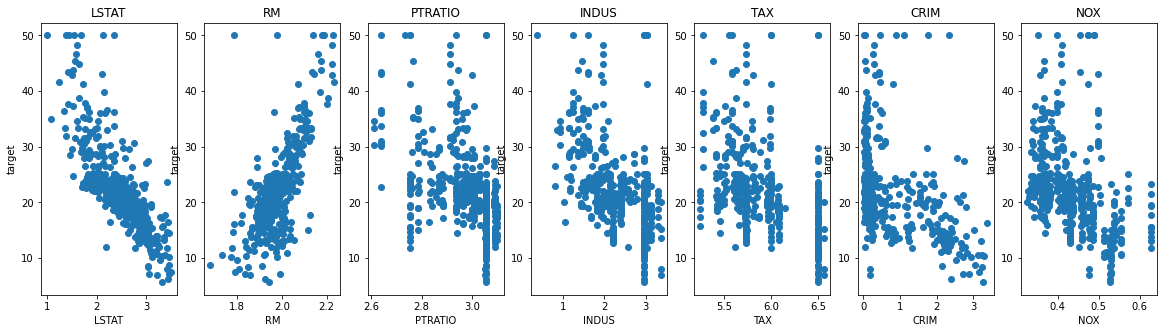

In [26]:
#most related features with target col(price)
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO','INDUS','TAX','CRIM','NOX']
target = housing['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

<AxesSubplot:>

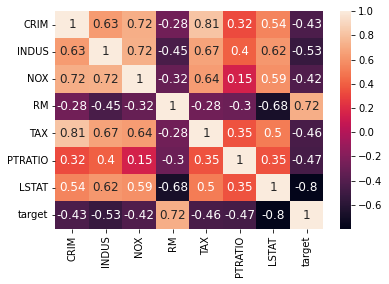

In [27]:
sns.heatmap(most_related.corr(),annot =True , annot_kws=  {'size':12})

In [28]:
#removing the least contributing feature column
features_to_remove = ['ZN', 'AGE', 'B']
housing.drop(features_to_remove, axis=1, inplace=True)

In [29]:
#standerlizing feature into same scale 
#AS Feature have different scales.
features = housing.drop('target',axis=1)
target = housing['target']
features = pd.DataFrame(StandardScaler().fit_transform(features),columns=features.columns)
features.head()
# feature Dataframe after Standarlizaion

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.759508,-1.705866,-0.050211,0.541925,0.320472,-1.800543,-0.549683,-1.471021,-1.351689
1,-0.736617,-0.307677,-0.710817,0.293975,0.725112,-1.234989,-1.076992,-0.244291,-0.297911
2,-0.736638,-0.307677,-0.710817,1.476888,0.725112,-1.234989,-1.076992,-0.244291,-1.696918
3,-0.731169,-1.768726,-0.818990,1.197887,1.153962,-0.833722,-1.302687,0.157723,-2.184306
4,-0.692454,-1.768726,-0.818990,1.420712,1.153962,-0.833722,-1.302687,0.157723,-1.238184


# spliting data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=2)

In [46]:
#model building
# Checking the shape of X_train,X_test,y_train and y_test
print("X Train Shape",X_train.shape)
print("Y Train Shape",y_train.shape)
print("X Test Shape",X_test.shape)
print("Y Test Shape",y_test.shape)

X Train Shape (332, 9)
Y Train Shape (332,)
X Test Shape (83, 9)
Y Test Shape (83,)


## LINEAR REGRESSION

In [47]:
# fit linear Regression Model
linear_r= LinearRegression()
linear_r= linear_r.fit(X_train, y_train)
predict = linear_r.predict(X_test)

In [48]:
print(f"R2 score :{r2_score(y_test, predict)},\nMSE : {mean_squared_error(y_test, predict)}")

R2 score :0.8158077633684192,
MSE : 14.912554269120365


In [34]:
# after changing random state from 1 to 2 the  and removing the 
#least contributing column ZN,AGE,B THE R2 scoreINCREASE FROM 70 to 80


# decision Tree Regeressor

In [36]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
  # predict
pred = model.predict(X_test)
print(f"R2 score :{r2_score(y_test, predict)},\n'RMSE' :{mean_squared_error(y_test, predict)**.5}")

R2 score :0.8001326416589886,
'RMSE' :3.8701432361130594


# Random forest Regressor

In [49]:
rf=RandomForestRegressor(criterion='mse')
param_grid={'n_estimators':[4,8,12,20,25],'max_depth':[5,10,15,20,25,30]}
clf=GridSearchCV(rf,param_grid,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [4, 8, 12, 20, 25]})

In [50]:
# Getting the best parameters
clf.best_params_

{'max_depth': 10, 'n_estimators': 25}

In [51]:
# Applying the best parameters on random forest
rf_tuned=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],criterion='mse',max_depth=clf.best_params_['max_depth'])
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=25)

In [40]:
print(f"R2 score :{r2_score(y_test, predict)},\n'RMSE' :{mean_squared_error(y_test, predict)**.5}")

R2 score :0.8001326416589886,
'RMSE' :3.8701432361130594


In [ ]:
#the linear regression  model is giving the best accuracy(r2-score)
#Data collected from a big urban city like Boston would not be applicable in a rural city,
#as for equal value of feaures prices are much higher in the urban area.